
# **Convolutions, Blurring and Sharpening Images**

####**In this lesson we'll learn:**
1. Convolution Operations
2. Blurring
3. Denoising
4. Sharpening

In [ ]:
!pip install wget
!pip install zipfile36
!pip install opencv-python

In [1]:
# download our images
import os
import wget
from zipfile import ZipFile


def bar_custom(current, total, width=80):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

URL = "https://github.com/Tuchsanai/DL-FOR-COMPUTER-VISION-2565_1/raw/main/week2/code/images.zip"

if not os.path.exists("images.zip"):
    wget.download(URL,bar=bar_custom)

if not os.path.exists("images"):
    with ZipFile('images.zip', 'r') as zipObj:
        # Extract all the contents of zip file in current directory
        zipObj.extractall()

In [2]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()


### **Blurring using Convolutions**

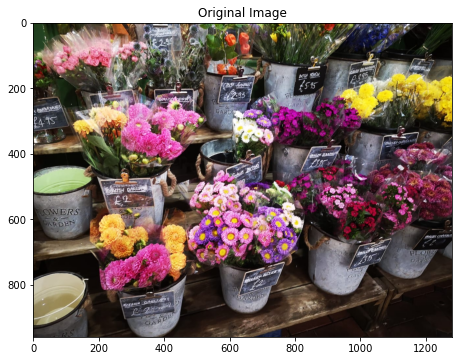

In [3]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpeg')
imshow('Original Image', image)


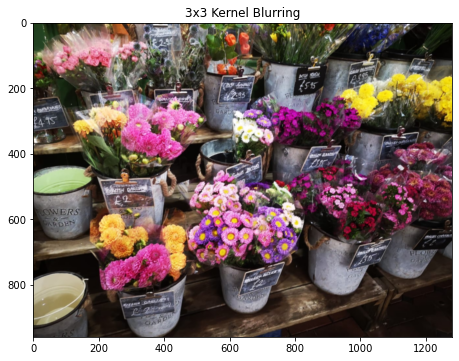

In [4]:

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
imshow('3x3 Kernel Blurring', blurred)


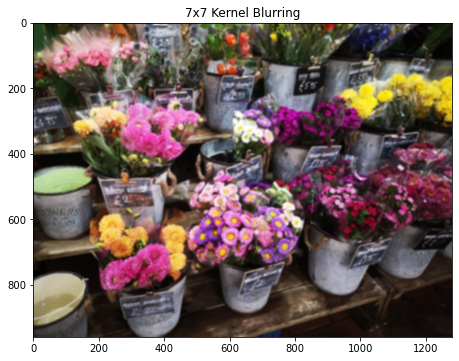

In [5]:

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
imshow('7x7 Kernel Blurring', blurred2)

### **Other commonly used blurring methods in OpenCV**
- Regular Blurring
- Gaussian Blurring
- Median Blurring

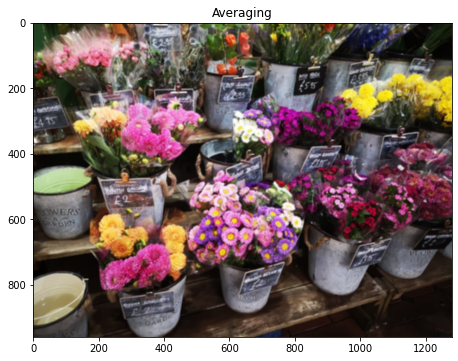

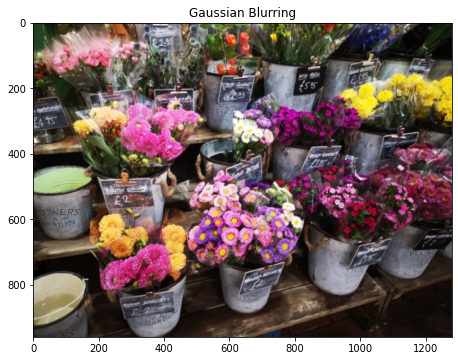

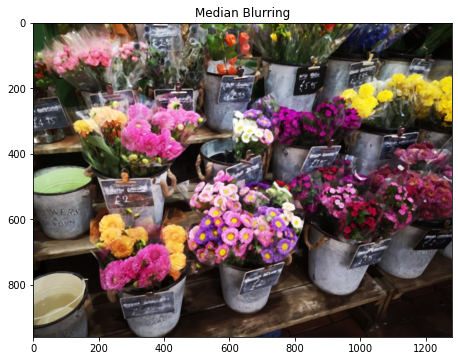

In [ ]:
import cv2
import numpy as np

image = cv2.imread('images/flowers.jpeg')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (5,5))
imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
Gaussian = cv2.GaussianBlur(image, (5,5), 0)
imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
imshow('Median Blurring', median)

### **Bilateral Filter**
#### ```dst = cv.bilateralFilter(src, d, sigmaColor, sigmaSpace[, dst[, borderType]])```
- **src**	Source 8-bit or floating-point, 1-channel or 3-channel image.
- **dst**	Destination image of the same size and type as src .
- **d**	Diameter of each pixel neighborhood that is used during filtering. If it is non-positive, it is computed from sigmaSpace.
- **sigmaColor**	Filter sigma in the color space. A larger value of the parameter means that farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, resulting in larger areas of semi-equal color.
- **sigmaSpace**	Filter sigma in the coordinate space. A larger value of the parameter means that farther pixels will influence each other as long as their colors are close enough (see sigmaColor ). When d>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is proportional to sigmaSpace.
- **borderType**	border mode used to extrapolate pixels outside of the image

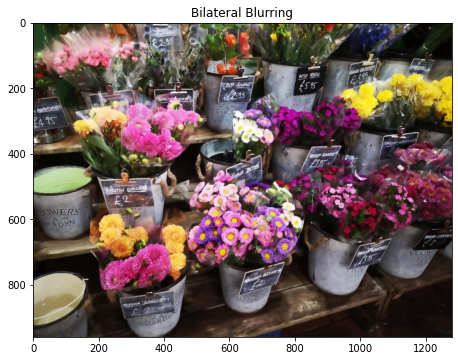

In [ ]:
# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
imshow('Bilateral Blurring', bilateral)

### **Sharpening Images**

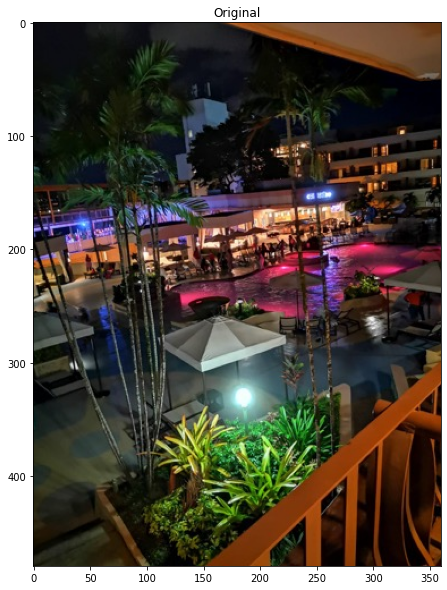

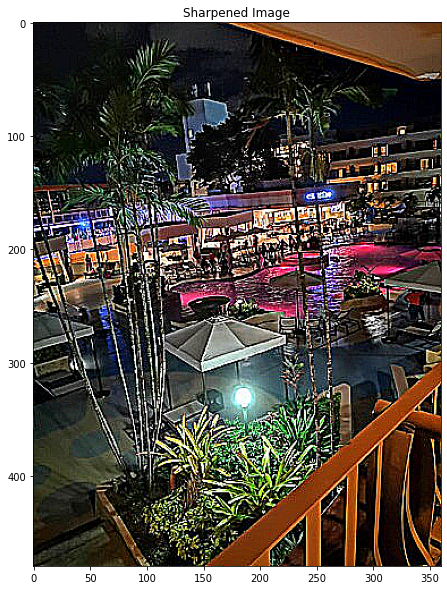

In [ ]:
# Loading our image
image = cv2.imread('images/hilton.jpeg')
imshow('Original', image)

# Create our shapening kernel, remember it must sum to one 
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1, 9,-1],
                              [-1,-1,-1]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
imshow('Sharpened Image', sharpened)